# Random matrix Theory
#### Marcomini Alessandro (2024286)

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Load data from output of FORTRAN program
eigendata = np.genfromtxt('eigenvals.csv', delimiter=',')
randomdata = np.genfromtxt('randomvals.csv', delimiter=',')

In [3]:
# Randomvals are in [0,1] -> reshape them in the range of the eigenvals
max_eigen = np.amax(eigendata, axis=1).reshape(-1,1)
min_eigen = np.amin(eigendata, axis=1).reshape(-1,1)

randomdata = (max_eigen - min_eigen)*randomdata
for i in range(randomdata.shape[0]):
    randomdata[i,:] = np.sort(randomdata[i,:] + min_eigen[i])

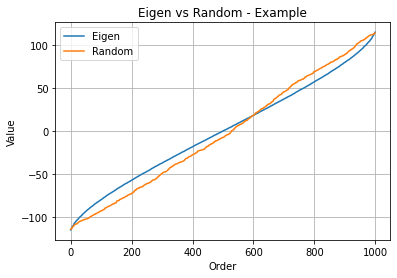

In [4]:
# Plot an example of sorted eigenvalues for hermitian matrix and real diagonal matrix
x = np.arange(eigendata.shape[1])

plt.plot(x,eigendata[1,:], label = 'Eigen')
plt.plot(x,randomdata[1,:], label = 'Random')
plt.xlabel('Order')
plt.ylabel('Value')
plt.title('Eigen vs Random - Example')
plt.grid()
plt.legend()
plt.show()

In [5]:
# Calculate normalized spectral gaps
gaps_e = np.diff(eigendata, axis = 1)
means_e = np.mean(gaps_e, axis = 1)
for i in range(len(gaps_e)):
    gaps_e[i,:] /= means_e[i]
    
gaps_r = np.diff(randomdata, axis = 1)
means_r = np.mean(gaps_r, axis = 1)
for i in range(len(gaps_r)):
    gaps_r[i,:] /= means_r[i]

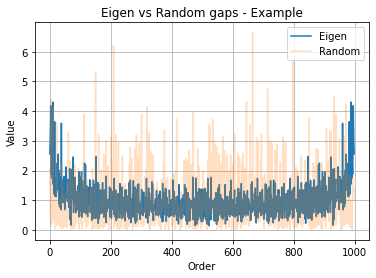

In [6]:
#Plot example of gaps distribution
x = np.arange(gaps_e.shape[1])

plt.plot(x,gaps_e[1,:], label = 'Eigen')
plt.plot(x,gaps_r[1,:], label = 'Random', alpha=0.25)
plt.xlabel('Order')
plt.ylabel('Value')
plt.title('Eigen vs Random gaps - Example')
plt.grid()
plt.legend()
plt.show()

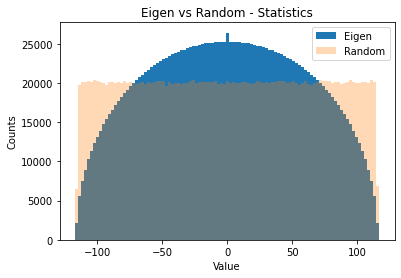

In [7]:
# Plot eigenvals distribution for the hermitian and random case (1k x 1k matrices)
# (2k samples) - Wigner semicircle ditribution
all_eigen = eigendata.flatten()
all_rand = randomdata.flatten()

plt.hist(all_eigen, bins = 101, label = 'Eigen')
plt.hist(all_rand, bins = 101, alpha=0.3, label = 'Random')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.title('Eigen vs Random - Statistics')
plt.legend()
plt.show()

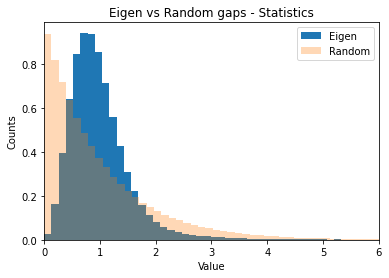

In [8]:
# Plot histogram of gaps distribution
all_eigen_gaps = gaps_e.flatten()
all_rand_gaps = gaps_r.flatten()

n_e, bins_e, patches_e = plt.hist(all_eigen_gaps, bins = 101, 
                                    label = 'Eigen', density=True)
n_r, bins_r, patches_r = plt.hist(all_rand_gaps, bins = 101, alpha=0.3, 
                                    label = 'Random', density=True)
plt.xlim([0,6])
plt.xlabel('Value')
plt.ylabel('Counts')
plt.title('Eigen vs Random gaps - Statistics')
plt.legend()
plt.show()

In [9]:
# Define P distribution for fit
def P(s, alpha, beta, a, b):
    A = a*np.sign(s)*(np.abs(s))**alpha
    B = np.exp(-b*np.sign(s)*(np.abs(s))**beta)
    return A*B

In [10]:
# Perform fit for hermitian eigenvals
center_bins_e = (bins_e[:-1] + bins_e[1:]) / 2
popt_e, pcov_e = curve_fit(P, center_bins_e, n_e)

print('fit: alpha=%5.3f, beta=%5.3f, a=%5.3f, b=%5.3f' % tuple(popt_e))

fit: alpha=2.568, beta=1.328, a=13.170, b=2.781


In [11]:
# Perform fit for random matrix eigenvals
center_bins_r = (bins_r[:-1] + bins_r[1:]) / 2
popt_r, pcov_r = curve_fit(P, center_bins_r, n_r)

print('fit: alpha=%5.3f, beta=%5.3f, a=%5.3f, b=%5.3f' % tuple(popt_r))

fit: alpha=-0.005, beta=1.011, a=0.985, b=0.983


<ipython-input-9-2755ca7cff9d>:4: RuntimeWarning: overflow encountered in exp
  B = np.exp(-b*np.sign(s)*(np.abs(s))**beta)


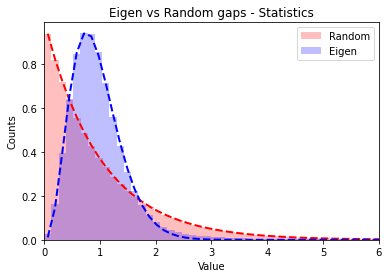

In [12]:
# Plot histograms with fitted curves
plt.plot(center_bins_r, P(center_bins_r, *popt_r), color='r', lw=2, ls='--')
plt.plot(center_bins_e, P(center_bins_e, *popt_e), color='b', lw=2, ls='--')
plt.hist(all_rand_gaps, bins = 101, color='r', label = 'Random', alpha = 0.25, density=True)
plt.hist(all_eigen_gaps, bins = 101, color='b', label = 'Eigen', alpha= 0.25, density=True)
plt.xlim([0,6])
plt.xlabel('Value')
plt.ylabel('Counts')
plt.title('Eigen vs Random gaps - Statistics')
plt.legend()
plt.show